<a href="https://colab.research.google.com/github/Touseeq99/BostonHousing/blob/main/BOSTON_HOUSING_PREDICATIONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [35]:
df = pd.read_csv("/content/BostonHousing.csv")
df.sample(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
417,25.94060,0.0,18.10,0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
234,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
343,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18,23.9


**Observation**
we only have Numerical Features
and the medv what we have to predict


In [36]:
df.rename (columns = {"medv":"price"} , inplace =True)
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


we converted **medv** with **Price** for better readablity

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


checking Null values

In [12]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


**RM** HAS 5 ROWS WITH NO DATA

Ploting Different Graphs for better understanding

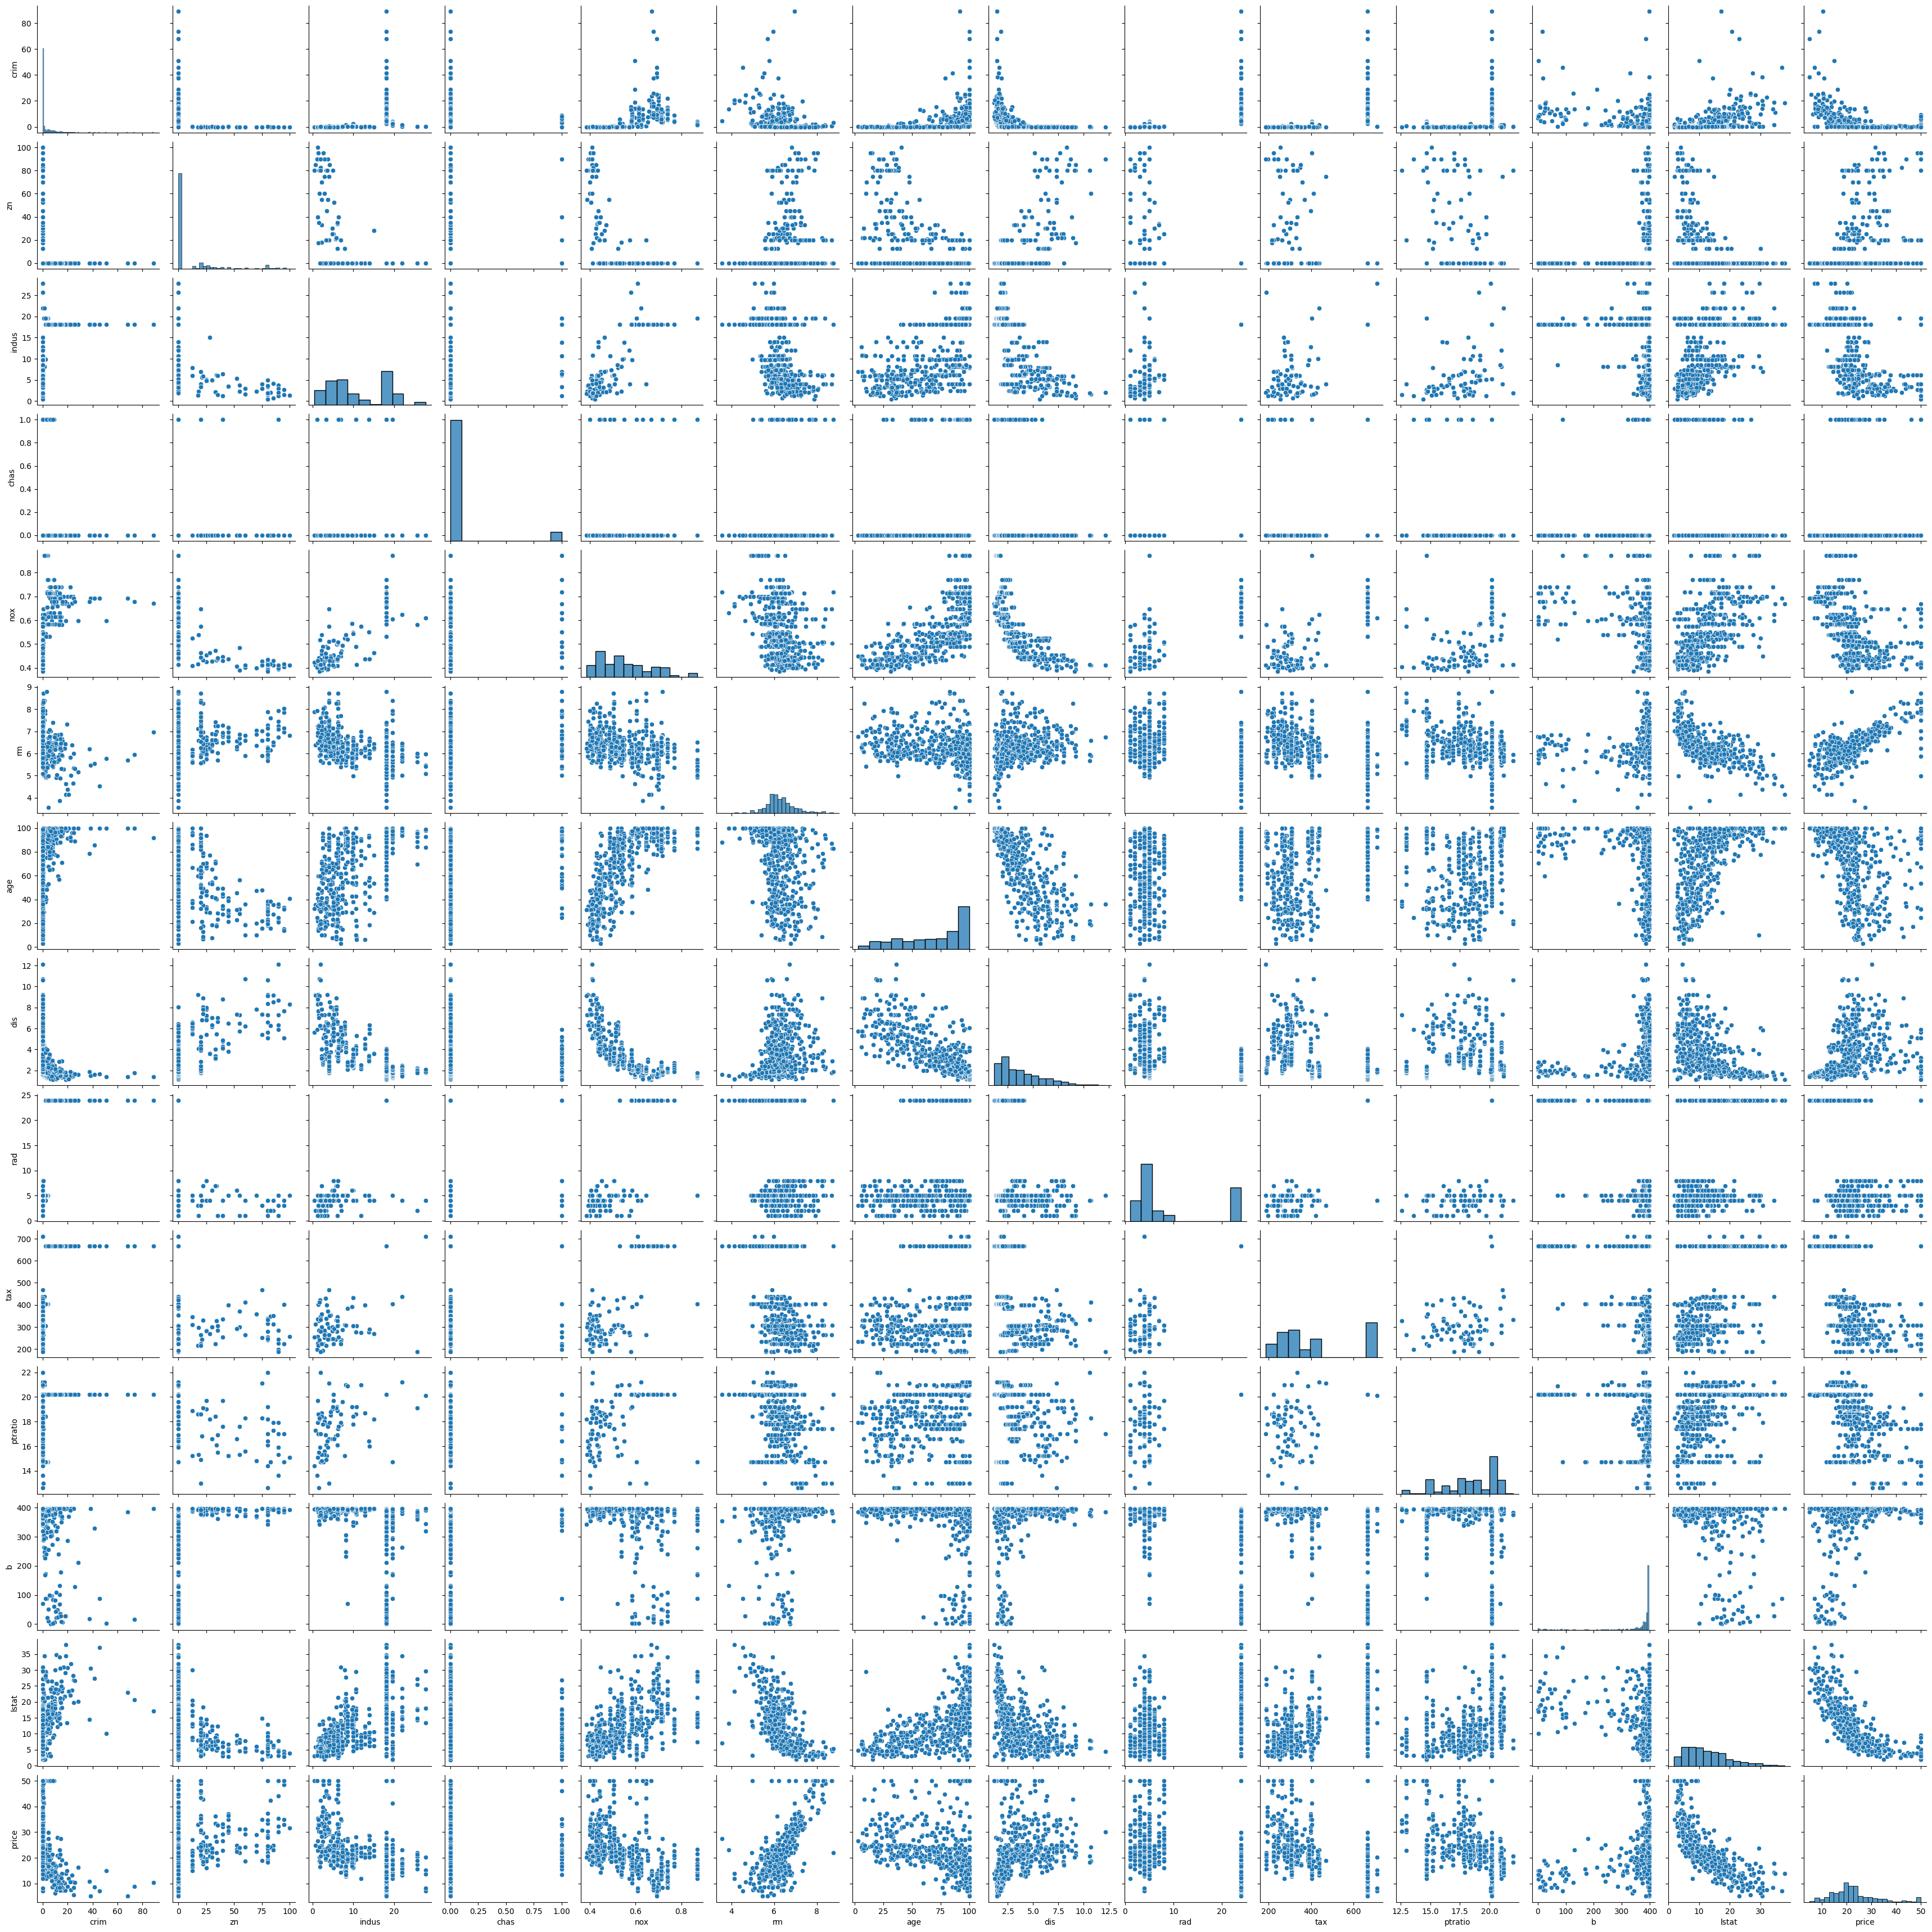

In [13]:
sns.pairplot(df)

In [60]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219433,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311173,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.394193,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091468,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302751,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240286,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.203507,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210718,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292794,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

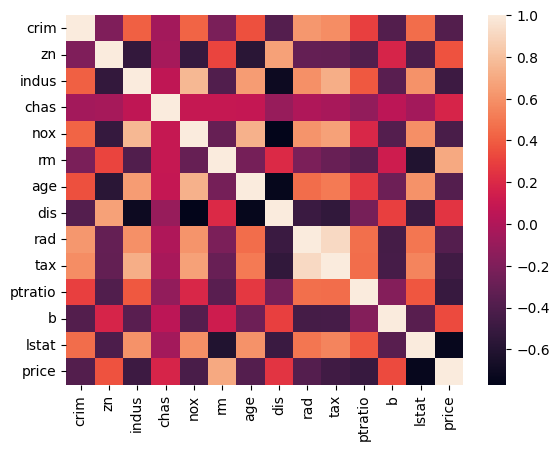

In [16]:
sns.heatmap(y)

From This we can identify that Price is mostly affected by **RM , B, CHAS, DIS , ZN** REST OF THEM HAVE NEGATIVE CORRELATED WITH OUR TARGET FEATURES

<Axes: xlabel='rm', ylabel='price'>

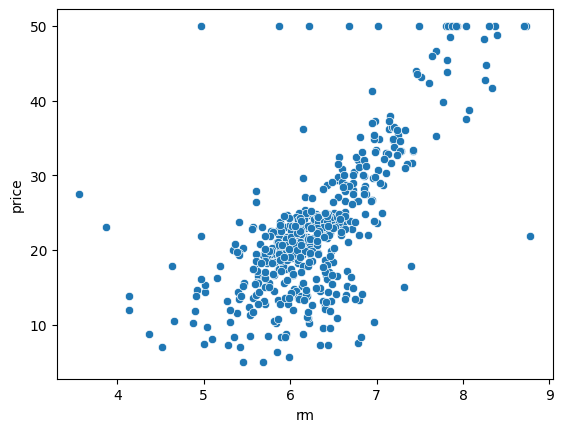

In [17]:
sns.scatterplot(x = "rm" , y = "price" , data = df)

Data is sort of linear in rm vs price

<Axes: xlabel='chas', ylabel='price'>

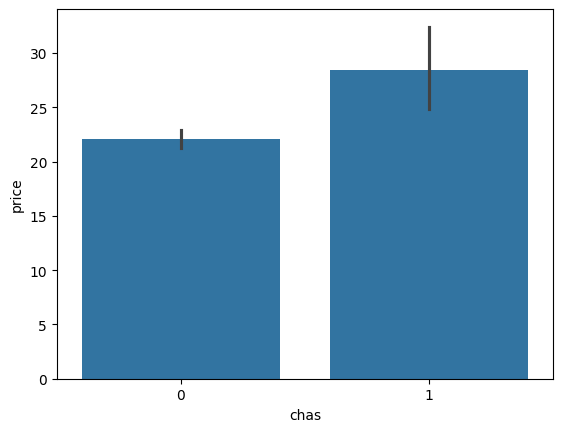

In [20]:
sns.barplot(x = "chas" , y = "price" , data = df)

CHECKING WHETHER DATA IS LINEAR DISTRIBUTED OR NOT

<Axes: xlabel='price', ylabel='Density'>

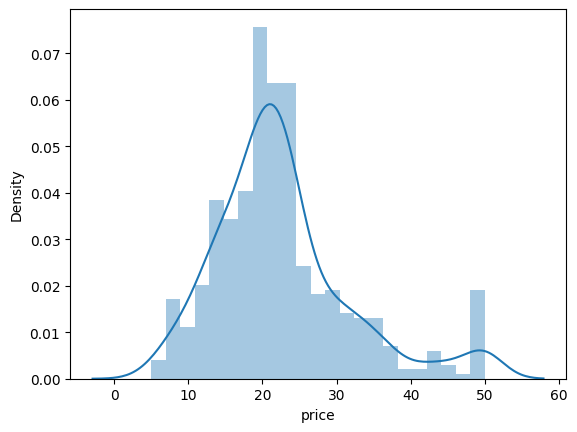

In [27]:
sns.distplot(df["price"])

<Axes: xlabel='rm', ylabel='Density'>

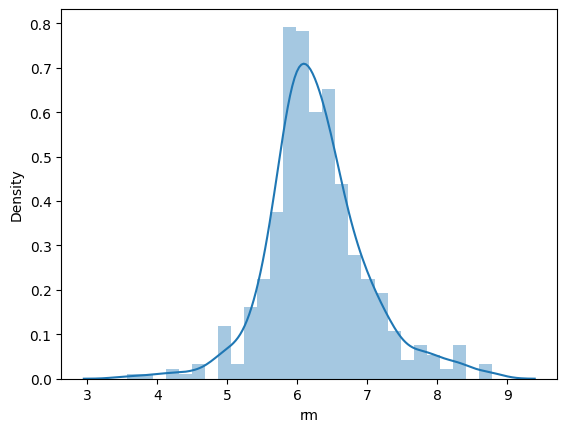

In [28]:
sns.distplot(df["rm"])

***both these features almost have normal distribution***

In [135]:
X1 = df.drop(columns=["price" , "dis"], axis=1)
y1 = df["price"]

In [136]:
X_test,X_train,y_test,y_train = train_test_split(X1,y1 ,test_size=0.2,random_state = 2)

In [128]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(404, 11)
(102, 11)
(404,)
(102,)


**MAKING PREPROCESING PIPELINES**

In [137]:
num_processing = Pipeline(steps=[
    ("imputer" ,SimpleImputer()),
    ("scaler" , StandardScaler())
])


In [138]:
numerical_cols = X1.columns

processor = ColumnTransformer(transformers=[
    ("num_processing" , num_processing , numerical_cols)
])


In [139]:
Preprocessor = Pipeline(steps= [
    ("Preprocessing" , processor),
    ("model" , LinearRegression())
])

In [140]:
y = Preprocessor.fit(X_train,y_train)

In [141]:
y_pred = y.predict(X_test)

In [142]:
r2_score(y_test,y_pred)

0.6332370891630967

In [143]:
mean_squared_error(y_test,y_pred)

31.017102764194235

In [146]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(Preprocessor, X1, y1, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean cross-validated R² score: {cv_scores.mean()}")


Cross-validated R² scores: [ 0.64584886  0.71841812  0.51832744  0.01020827 -0.38905485]
Mean cross-validated R² score: 0.30074956810181175


In [148]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessing', processor),
    ('model', RandomForestRegressor())
])

rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)
print("Random Forest R² Score:", r2_score(y_test, rf_y_pred))


Random Forest R² Score: 0.7346599967575688


In [149]:
import pickle
pickle.dump(rf_pipeline,open('rf_pipline.pkl','wb'))

In [155]:
file_model = pickle.load(open('/content/rf_pipline.pkl','rb'))